In [1]:
# mkdir /home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/

In [1]:
import six

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from anchor.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER

sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

%load_ext autoreload
%autoreload 2

folder = 'figures' #'/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages'

import flotilla
study = flotilla.embark('singlecell_pnm_figure2_modalities_rmdup', 
# study = flotilla.embark('singlecell_pnm_figure2_modalities_bayesian', 
                        flotilla_dir='/projects/ps-yeolab/obotvinnik/flotilla_projects/')
# study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering')

/home/obotvinnik/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/obotvinnik/workspace-git/flotilla/flotilla/__init__.py:65: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2017-01-05 15:56:41	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_rmdup/datapackage.json
2017-01-05 15:56:41	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.
2017-01-05 15:57:04 	Initializing Study
2017-01-05 15:57:04 	Initializing Predictor configuration manager for Study
2017-01-05 15:57:04	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2017-01-05 15:57:04	Added ExtraTreesClassifier to default predictors
2017-01-05 15:57:04	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2017-01-05 15:57:04	Added ExtraTreesRegressor to default predictors
2017-01-05 15:57:04	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2017-01-05 15:57:04	Added GradientBoostingClassifie

Error loading species hg19 data: HTTP Error 404: Not Found

In [2]:
figure_folder = 'figures/001_modality_transitions_heatmaps_barplots'

In [3]:
# mkdir $folder

In [4]:
modality_transitions = study.supplemental.modalities_tidy.merge(
    study.supplemental.modalities_tidy, left_on='event_id', right_on='event_id')
modality_transitions.head()

,phenotype_x,event_id,modality_x,phenotype_y,modality_y
0,MN,isoform1=junction:chr10:102114390-102120490:+|...,included,MN,included
1,MN,isoform1=junction:chr10:102114390-102120490:+|...,included,NPC,included
2,MN,isoform1=junction:chr10:102114390-102120490:+|...,included,iPSC,included
3,NPC,isoform1=junction:chr10:102114390-102120490:+|...,included,MN,included
4,NPC,isoform1=junction:chr10:102114390-102120490:+|...,included,NPC,included


In [5]:
modality_transitions['transition'] = modality_transitions['phenotype_x'] + '-' + modality_transitions['phenotype_y']
modality_transitions.head()

,phenotype_x,event_id,modality_x,phenotype_y,modality_y,transition
0,MN,isoform1=junction:chr10:102114390-102120490:+|...,included,MN,included,MN-MN
1,MN,isoform1=junction:chr10:102114390-102120490:+|...,included,NPC,included,MN-NPC
2,MN,isoform1=junction:chr10:102114390-102120490:+|...,included,iPSC,included,MN-iPSC
3,NPC,isoform1=junction:chr10:102114390-102120490:+|...,included,MN,included,NPC-MN
4,NPC,isoform1=junction:chr10:102114390-102120490:+|...,included,NPC,included,NPC-NPC


In [6]:
transitions_of_interest = ['iPSC-NPC', 'iPSC-MN']

In [7]:
modality_transitions_subset = modality_transitions.query('transition in @transitions_of_interest')
modality_transitions_subset.head()

,phenotype_x,event_id,modality_x,phenotype_y,modality_y,transition
6,iPSC,isoform1=junction:chr10:102114390-102120490:+|...,included,MN,included,iPSC-MN
7,iPSC,isoform1=junction:chr10:102114390-102120490:+|...,included,NPC,included,iPSC-NPC
15,iPSC,isoform1=junction:chr10:102746733-102747069:-|...,included,MN,bimodal,iPSC-MN
16,iPSC,isoform1=junction:chr10:102746733-102747069:-|...,included,NPC,bimodal,iPSC-NPC
25,iPSC,isoform1=junction:chr10:103348158-103360494:+|...,included,MN,included,iPSC-MN


In [8]:
modality_transitions_subset.head()

,phenotype_x,event_id,modality_x,phenotype_y,modality_y,transition
6,iPSC,isoform1=junction:chr10:102114390-102120490:+|...,included,MN,included,iPSC-MN
7,iPSC,isoform1=junction:chr10:102114390-102120490:+|...,included,NPC,included,iPSC-NPC
15,iPSC,isoform1=junction:chr10:102746733-102747069:-|...,included,MN,bimodal,iPSC-MN
16,iPSC,isoform1=junction:chr10:102746733-102747069:-|...,included,NPC,bimodal,iPSC-NPC
25,iPSC,isoform1=junction:chr10:103348158-103360494:+|...,included,MN,included,iPSC-MN


In [9]:
modality_transitions_subset.query('transition == "iPSC-MN"')['event_id'].unique().shape

(1855,)

In [10]:
(modality_transitions_subset.modality_x == modality_transitions_subset.modality_y).sum()

3681

In [11]:
ipsc_mn_changing_events = set(modality_transitions_subset.query(
        '(transition == "iPSC-MN") & (modality_x != modality_y)')['event_id'])
ipsc_npc_changing_events = set(modality_transitions_subset.query(
        '(transition == "iPSC-NPC") & (modality_x != modality_y)')['event_id'])
six.print_(len(ipsc_npc_changing_events), len(ipsc_mn_changing_events))

558 361


## GO enrichment

In [12]:
study.splicing.feature_expression_id_col = 'ensembl_id'

In [13]:
go_dfs = []

for transition, df in modality_transitions_subset.groupby('transition'):
    background_events = df['event_id']
    foreground_events = background_events.loc[df.modality_x != df.modality_y]
    
    foreground = study.splicing.splicing_to_expression_id(foreground_events)
    background = study.splicing.splicing_to_expression_id(background_events)
    
    go_df = study.go_enrichment(foreground, background, domain='biological_process')
    
    
    fig, ax = plt.subplots(figsize=(1, 1))
    n = 5
    bottom = np.arange(n)
    height = go_df['bonferonni_corrected_negative_log_p_value'].iloc[:n]
    ax.barh(bottom, height, color='gray', zorder=-1)
    ax.set(yticklabels=go_df['go_name'].iloc[:n], 
           xlabel='$\log(q)$', title=transition, yticks=bottom + 0.4)
    ax.grid(axis='x', color='white', zorder=100, linewidth=0.5)
    sns.despine()
    fig.savefig('{}/changing_events_{}_go_enrichment.pdf'.format(folder, transition))
    
    go_df['transition'] = transition
    go_dfs.append(go_df.reset_index())
go = pd.concat(go_dfs)
go.head()

ValueError: Features of interest and background do not overlap! Not calculating GO enrichment

In [14]:
(df.modality_x == df.modality_y).sum()

6238

In [15]:
len(background)

8404

### Try with the "world" of background events is equal between these (all events with 10+ cells in all celltypes)

In [16]:
events_detected_in_all = set(study.supplemental.modalities_tidy.groupby('event_id').filter(
    lambda x: len(x) == len(study.phenotype_order))['event_id'])
len(events_detected_in_all)

1704

In [17]:
ipsc_mn_changing_events_detected_in_all = ipsc_mn_changing_events & events_detected_in_all
ipsc_npc_changing_events_detected_in_all = ipsc_npc_changing_events & events_detected_in_all

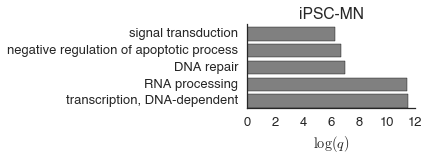

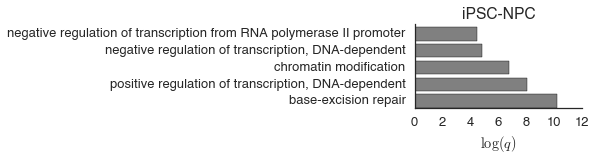

In [18]:
modality_transitions_subset_detected_in_all = modality_transitions_subset.loc[modality_transitions_subset.event_id.isin(events_detected_in_all)]

go_dfs = []

for transition, df in modality_transitions_subset_detected_in_all.groupby('transition'):
    background_events = df['event_id']
    foreground_events = background_events.loc[df.modality_x != df.modality_y]
    
    foreground = study.splicing.splicing_to_expression_id(foreground_events)
    background = study.splicing.splicing_to_expression_id(background_events)
    
    go_df = study.go_enrichment(foreground, background, domain='biological_process')
    
    
    fig, ax = plt.subplots(figsize=(3, 1.5))
    n = 5
    bottom = np.arange(n)
    height = go_df['bonferonni_corrected_negative_log_p_value'].iloc[:n]
    ax.barh(bottom, height, color='gray')
    ax.set(yticklabels=go_df['go_name'].iloc[:n], 
           xlabel='$\log(q)$', title=transition, yticks=bottom + 0.4)
    sns.despine()
    fig.savefig('{}/changing_events_{}_go_enrichment_detected_inall.pdf'.format(folder, transition))
    
#     go_df['transition'] = transition
#     go_dfs.append(go_df.reset_index())
# go = pd.concat(go_dfs)
# go.head()

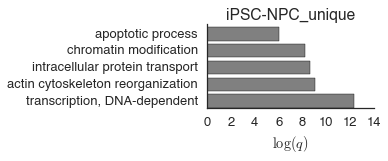

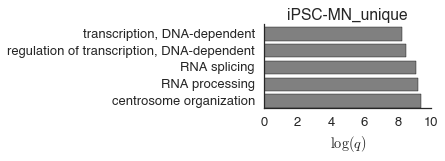

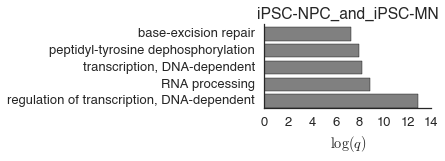

In [19]:
changing_events_unique_to_transition = \
    {'iPSC-MN_unique' : ipsc_mn_changing_events_detected_in_all.difference(ipsc_npc_changing_events_detected_in_all),
     'iPSC-NPC_and_iPSC-MN' : ipsc_mn_changing_events_detected_in_all.intersection(ipsc_npc_changing_events_detected_in_all),
     'iPSC-NPC_unique' : ipsc_npc_changing_events_detected_in_all.difference(ipsc_mn_changing_events_detected_in_all)
    }
    
background_events = events_detected_in_all

for transition, foreground_events in changing_events_unique_to_transition.items():    
    foreground = study.splicing.splicing_to_expression_id(foreground_events)
    background = study.splicing.splicing_to_expression_id(background_events)
    
    go_df = study.go_enrichment(foreground, background, domain='biological_process')
    
    fig, ax = plt.subplots(figsize=(3, 1.5))
    n = 5
    bottom = np.arange(n)
    height = go_df['bonferonni_corrected_negative_log_p_value'].iloc[:n]
    ax.barh(bottom, height, color='gray')
    ax.set(yticklabels=go_df['go_name'].iloc[:n], 
           xlabel='$\log(q)$', title=transition, yticks=bottom + 0.4)
    sns.despine()
    fig.savefig('{}/changing_events_{}_go_enrichment_detected_inall.pdf'.format(folder, transition))
    
#     go_df['transition'] = transition
#     go_dfs.append(go_df.reset_index())
# go = pd.concat(go_dfs)
# go.head()

## Venn diagrams

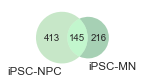

In [18]:
import matplotlib_venn
sns.set(context='paper', style='ticks')

fig, ax = plt.subplots(figsize=(1.5, 1.5))

matplotlib_venn.venn2((ipsc_npc_changing_events, ipsc_mn_changing_events), 
                      set_labels=['iPSC-NPC', 'iPSC-MN'], set_colors=study.phenotype_color_ordered[1:])
fig.savefig('{}/changing_events_venn.pdf'.format(folder))

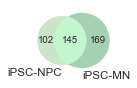

In [19]:
import matplotlib_venn

fig, ax = plt.subplots(figsize=(1.5, 1.5))

matplotlib_venn.venn2((ipsc_npc_changing_events_detected_in_all, ipsc_mn_changing_events_detected_in_all), 
                      set_labels=['iPSC-NPC', 'iPSC-MN'], set_colors=study.phenotype_color_ordered[1:])
fig.savefig('{}/changing_events_venn_detected_in_all.pdf'.format(folder))

### Barplots of the percentage of evetns changing in each modality

In [20]:
modality_transitions_subset['transition'] = pd.Categorical(modality_transitions_subset['transition'], 
                                                           categories=transitions_of_interest, ordered=True)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [21]:
modality_transitions_subset.head()

,phenotype_x,event_id,modality_x,phenotype_y,modality_y,transition
6,iPSC,isoform1=junction:chr10:102114390-102120490:+|...,included,MN,included,iPSC-MN
7,iPSC,isoform1=junction:chr10:102114390-102120490:+|...,included,NPC,included,iPSC-NPC
15,iPSC,isoform1=junction:chr10:102746733-102747069:-|...,included,MN,bimodal,iPSC-MN
16,iPSC,isoform1=junction:chr10:102746733-102747069:-|...,included,NPC,bimodal,iPSC-NPC
25,iPSC,isoform1=junction:chr10:103348158-103360494:+|...,included,MN,included,iPSC-MN


In [22]:
bimodal_x = modality_transitions_subset['modality_x'] == 'bimodal'
bimodal_y = modality_transitions_subset['modality_y'] == 'bimodal'

print((bimodal_x & bimodal_y).sum())

bimodal_bimodal = modality_transitions_subset.loc[bimodal_x & bimodal_y]
bimodal_bimodal.groupby('transition').size()

345


transition
iPSC-NPC    240
iPSC-MN     105
dtype: int64

In [23]:
same_modality = modality_transitions_subset.groupby('transition').apply(lambda x: (x['modality_y'] == x['modality_x']).sum())
same_modality.name = 'Same Modality'
changing_modality = modality_transitions_subset.groupby('transition').apply(lambda x: (x['modality_y'] != x['modality_x']).sum())
changing_modality.name = 'Switching Modality'
changing_modality

transition
iPSC-NPC    558
iPSC-MN     361
Name: Switching Modality, dtype: int64

In [24]:
n_modality_changes = pd.concat([changing_modality, same_modality], axis=1).unstack()
n_modality_changes = n_modality_changes.reset_index()
n_modality_changes = n_modality_changes.rename(columns={'level_0': "Modality", 0:'# AS Exons'})
n_modality_changes['% AS Exons'] = 100 * n_modality_changes.groupby('transition')['# AS Exons'].apply(lambda x: x/x.sum())
n_modality_changes

,Modality,transition,# AS Exons,% AS Exons
0,Switching Modality,iPSC-NPC,558,20.327869
1,Switching Modality,iPSC-MN,361,19.460916
2,Same Modality,iPSC-NPC,2187,79.672131
3,Same Modality,iPSC-MN,1494,80.539084


In [25]:
percent_exons_change_modalities = n_modality_changes.set_index(['transition', 'Modality'])['% AS Exons']
percent_exons_change_modalities

transition  Modality          
iPSC-NPC    Switching Modality    20.327869
iPSC-MN     Switching Modality    19.460916
iPSC-NPC    Same Modality         79.672131
iPSC-MN     Same Modality         80.539084
Name: % AS Exons, dtype: float64

In [26]:
cumulative_sum = percent_exons_change_modalities.groupby(level='transition').cumsum()
cumulative_sum

transition  Modality          
iPSC-NPC    Switching Modality     20.327869
iPSC-MN     Switching Modality     19.460916
iPSC-NPC    Same Modality         100.000000
iPSC-MN     Same Modality         100.000000
Name: % AS Exons, dtype: float64

In [27]:
bottoms = cumulative_sum - percent_exons_change_modalities
bottoms

transition  Modality          
iPSC-NPC    Switching Modality     0.000000
iPSC-MN     Switching Modality     0.000000
iPSC-NPC    Same Modality         20.327869
iPSC-MN     Same Modality         19.460916
Name: % AS Exons, dtype: float64

### plot the percent of events that change or don't change modality

Same Modality
Switching Modality


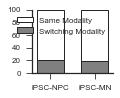

In [28]:
idx = pd.IndexSlice

sns.set(style='ticks', context='paper')
fig, ax = plt.subplots(figsize=(1.75, 1.5))
palette = ['white', 'grey'] #sns.color_palette('Greys', n_colors=2)
width = 0.6

for i, (delta_modality, s) in enumerate(percent_exons_change_modalities.groupby(level=1)):
    six.print_(delta_modality)
    color = palette[i]
    x = np.arange(s.shape[0])+0.1

    bottom = bottoms.loc[idx[:, delta_modality]]
    ax.bar(x, s, bottom=bottom, label=delta_modality, color=color, edgecolor='#262626', linewidth=1, width=width)
ax.set(xticks=x + 0.3, xticklabels=bottoms.index.levels[0])
ax.legend()
sns.despine()
fig.tight_layout()
fig.savefig('{}/n_exons_change_modalities_barplot_stacked.pdf'.format(folder))


## Get just iPSC, MN modalities

In [29]:
rows = (modality_transitions.phenotype_x == 'iPSC') & (modality_transitions.phenotype_y == 'MN')
ipsc_mn_modalities = modality_transitions.loc[rows]
ipsc_mn_modalities.head()

,phenotype_x,event_id,modality_x,phenotype_y,modality_y,transition
6,iPSC,isoform1=junction:chr10:102114390-102120490:+|...,included,MN,included,iPSC-MN
15,iPSC,isoform1=junction:chr10:102746733-102747069:-|...,included,MN,bimodal,iPSC-MN
25,iPSC,isoform1=junction:chr10:103348158-103360494:+|...,included,MN,included,iPSC-MN
34,iPSC,isoform1=junction:chr10:103361094-103368591:+|...,excluded,MN,excluded,iPSC-MN
43,iPSC,isoform1=junction:chr10:1034468-1041868:+|isof...,included,MN,included,iPSC-MN


In [30]:
ipsc_mn_modality_count = ipsc_mn_modalities.groupby(['modality_x', 'modality_y']).size()
ipsc_mn_modality_count

modality_x     modality_y   
bimodal        bimodal          105
               excluded          54
               included          45
excluded       bimodal           97
               excluded         753
               included           2
included       bimodal          136
               included         636
               uncategorized      1
uncategorized  bimodal           17
               excluded           8
               included           1
dtype: int64

## Randomly permute events and see if they switch or stay the same

In [31]:
cols = ['modality_x', 'modality_y']

In [32]:
dfs = []

for i in range(100):
    modality_x_permuted = pd.Series(np.random.permutation(ipsc_mn_modalities['modality_x']), 
                                    index=ipsc_mn_modalities['modality_y'].index, name='modality_x')

    two_modalities = pd.concat([modality_x_permuted, ipsc_mn_modalities['modality_y']], axis=1)
#     print(two_modalities.shape)
#     two_modalities.head()
    sizes = two_modalities.groupby(cols).size().reset_index()
    sizes = sizes.rename(columns={0: 'Number of events'})
    sizes['Percentage of events'] = 100*sizes['Number of events']/ipsc_mn_modalities.shape[0]
    sizes['iteration'] = i
    dfs.append(sizes)
permuted_changing_modalities = pd.concat(dfs, ignore_index=True)
print(permuted_changing_modalities.shape)
permuted_changing_modalities.head()

(1300, 5)


,modality_x,modality_y,Number of events,Percentage of events,iteration
0,bimodal,bimodal,30,1.617251,0
1,bimodal,excluded,94,5.067385,0
2,bimodal,included,80,4.312668,0
3,excluded,bimodal,164,8.840970,0
4,excluded,excluded,378,20.377358,0


In [33]:
def add_switching_columns(df):
    df['Modality change'] = 'Same modality'
    
    changing = df['modality_x'] != df['modality_y']
    df.loc[changing, 'Modality change'] = 'Switching modality'


In [34]:
add_switching_columns(permuted_changing_modalities)
permuted_changing_modalities.head()

,modality_x,modality_y,Number of events,Percentage of events,iteration,Modality change
0,bimodal,bimodal,30,1.617251,0,Same modality
1,bimodal,excluded,94,5.067385,0,Switching modality
2,bimodal,included,80,4.312668,0,Switching modality
3,excluded,bimodal,164,8.840970,0,Switching modality
4,excluded,excluded,378,20.377358,0,Same modality


In [35]:
permuted_changing_modalities.groupby('Modality change')['Percentage of events'].mean()

Modality change
Same modality         12.544886
Switching modality     6.230219
Name: Percentage of events, dtype: float64

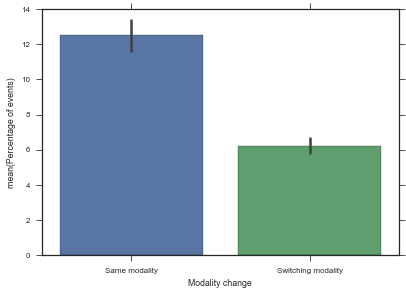

In [36]:
sns.barplot(y='Percentage of events', x='Modality change', data=permuted_changing_modalities)

## Heatmaps

In [37]:

ipsc_mn_modality_2d = ipsc_mn_modality_count.unstack()
ipsc_mn_modality_2d.head()

modality_y,bimodal,excluded,included,uncategorized
modality_x,,,,
bimodal,105.0,54.0,45.0,NaN
excluded,97.0,753.0,2.0,NaN
included,136.0,NaN,636.0,1.0
uncategorized,17.0,8.0,1.0,NaN


In [38]:
ipsc_mn_modality_2d.index.name = 'iPSC'
ipsc_mn_modality_2d.columns.name = 'MN'
ipsc_mn_modality_2d.head()

MN,bimodal,excluded,included,uncategorized
iPSC,,,,
bimodal,105.0,54.0,45.0,NaN
excluded,97.0,753.0,2.0,NaN
included,136.0,NaN,636.0,1.0
uncategorized,17.0,8.0,1.0,NaN


In [39]:
from anchor import MODALITY_ORDER

In [40]:
ipsc_mn_modality_2d = ipsc_mn_modality_2d.reindex(index=MODALITY_ORDER, columns=MODALITY_ORDER)
ipsc_mn_modality_2d

MN,excluded,bimodal,included,middle,uncategorized
iPSC,,,,,
excluded,753.0,97.0,2.0,NaN,NaN
bimodal,54.0,105.0,45.0,NaN,NaN
included,NaN,136.0,636.0,NaN,1.0
middle,NaN,NaN,NaN,NaN,NaN
uncategorized,8.0,17.0,1.0,NaN,NaN


In [41]:
sns.set(style='ticks', context='paper')

### Get percentages for comparison - use % of events in both

In [45]:
percentages = 100*ipsc_mn_modality_2d.divide(ipsc_mn_modality_2d.sum(axis=1), axis=0)
percentages

MN,excluded,bimodal,included,middle,uncategorized
iPSC,,,,,
excluded,88.380282,11.384977,0.234742,NaN,NaN
bimodal,26.470588,51.470588,22.058824,NaN,NaN
included,NaN,17.593790,82.276843,NaN,0.129366
middle,NaN,NaN,NaN,NaN,NaN
uncategorized,30.769231,65.384615,3.846154,NaN,NaN


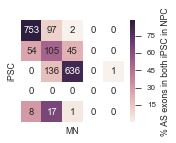

In [46]:
import colorsys

fig, ax = plt.subplots(figsize=(2.5, 2))
sns.heatmap(percentages, cbar_kws=dict(label='% AS exons in both iPSC in NPC'))#, annot=True, fmt='.1f')

# fig.axes[-1].yaxis.locator_params()

raw = ipsc_mn_modality_2d.ix[::-1]

mesh = ax.collections[0]

fmt = 'g'

mesh.update_scalarmappable()
xpos, ypos = np.meshgrid(ax.get_xticks(), ax.get_yticks())
for x, y, percentage, val, color in zip(xpos.flat, ypos.flat, 
                            mesh.get_array(), raw.values.flat, mesh.get_facecolors()):
#     print val
    if percentage is not np.ma.masked:
        _, l, _ = colorsys.rgb_to_hls(*color[:3])
        text_color = ".15" if l > .5 else "w"
        val = ("{:" + fmt + "}").format(val)
        text_kwargs = dict(color=text_color, ha="center", va="center")
#         text_kwargs.update(self.annot_kws)
        ax.text(x, y, val, **text_kwargs)
    else:
        text_kwargs = dict(color='.15', ha="center", va="center")
        ax.text(x, y, 0, **text_kwargs)
ax.set(xticks=[], yticks=[])
fig.tight_layout()
fig.savefig('{}/ipsc_to_mn_modality_heatmap.pdf'.format(folder))

### iPSC-NPC $\Delta$ modality heatmap

In [47]:
rows = (modality_transitions.phenotype_x == 'iPSC') & (modality_transitions.phenotype_y == 'NPC')
ipsc_npc_modalities = modality_transitions.loc[rows]
ipsc_npc_modalities.head()

,phenotype_x,event_id,modality_x,phenotype_y,modality_y,transition
7,iPSC,isoform1=junction:chr10:102114390-102120490:+|...,included,NPC,included,iPSC-NPC
16,iPSC,isoform1=junction:chr10:102746733-102747069:-|...,included,NPC,bimodal,iPSC-NPC
26,iPSC,isoform1=junction:chr10:103348158-103360494:+|...,included,NPC,included,iPSC-NPC
35,iPSC,isoform1=junction:chr10:103361094-103368591:+|...,excluded,NPC,excluded,iPSC-NPC
44,iPSC,isoform1=junction:chr10:1034468-1041868:+|isof...,included,NPC,included,iPSC-NPC


In [48]:
ipsc_npc_modality_count = ipsc_npc_modalities.groupby(['modality_x', 'modality_y']).size()
ipsc_npc_modality_2d = ipsc_npc_modality_count.unstack()
ipsc_npc_modality_2d.index.name = 'iPSC'
ipsc_npc_modality_2d.columns.name = 'NPC'
ipsc_npc_modality_2d = ipsc_npc_modality_2d.reindex(index=MODALITY_ORDER, columns=MODALITY_ORDER)
ipsc_npc_percentages = 100*ipsc_npc_modality_2d.divide(ipsc_npc_modality_2d.sum(axis=1), axis=0)
ipsc_npc_percentages

NPC,excluded,bimodal,included,middle,uncategorized
iPSC,,,,,
excluded,87.500000,12.500000,NaN,NaN,NaN
bimodal,24.647887,56.338028,18.779343,NaN,0.234742
included,NaN,18.005540,81.994460,NaN,NaN
middle,NaN,NaN,NaN,NaN,NaN
uncategorized,17.857143,75.000000,NaN,NaN,7.142857


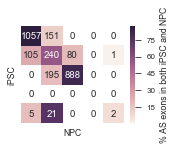

In [49]:
import colorsys

fig, ax = plt.subplots(figsize=(2.5, 2))
sns.heatmap(ipsc_npc_percentages, cbar_kws=dict(label='% AS exons in both iPSC and NPC'))#, annot=True, fmt='.1f')

# fig.axes[-1].yaxis.locator_params()

raw = ipsc_npc_modality_2d.ix[::-1]

mesh = ax.collections[0]

fmt = 'g'

mesh.update_scalarmappable()
xpos, ypos = np.meshgrid(ax.get_xticks(), ax.get_yticks())
for x, y, percentage, val, color in zip(xpos.flat, ypos.flat, 
                            mesh.get_array(), raw.values.flat, mesh.get_facecolors()):
#     print val
    if percentage is not np.ma.masked:
        _, l, _ = colorsys.rgb_to_hls(*color[:3])
        text_color = ".15" if l > .5 else "w"
        val = ("{:" + fmt + "}").format(val)
        text_kwargs = dict(color=text_color, ha="center", va="center")
#         text_kwargs.update(self.annot_kws)
        ax.text(x, y, val, **text_kwargs)
    else:
        text_kwargs = dict(color='.15', ha="center", va="center")
        ax.text(x, y, 0, **text_kwargs)
ax.set(xticks=[], yticks=[])
fig.tight_layout()
fig.savefig('{}/ipsc_to_npc_modality_heatmap.pdf'.format(folder))

## Statistical enrichment of motif changes

In [50]:
transitions = [(u'iPSC', u'NPC'), (u'iPSC', u'MN')]

In [51]:
hypergeom?

Object `hypergeom` not found.


In [52]:
from scipy.stats import hypergeom

In [53]:
import itertools

lines = []

for phenotype1, phenotype2 in transitions:
    modality_subset = modality_transitions.query('(phenotype_x == @phenotype1) & (phenotype_y == @phenotype2)')
#     six.print_(phenotype1, phenotype2, modality_subset.shape)
    M = len(modality_subset['event_id'].unique())
    
    for modality1, modality2 in itertools.product(MODALITY_ORDER, repeat=2):
#         six.print_('\t', modality1, modality2)
        df1 = modality_subset.query('(phenotype_x == @phenotype1) & (modality_x == @modality1)')
        df2 = modality_subset.query('(phenotype_y == @phenotype2) & (modality_y == @modality2)')
        
        n = df1.shape[0]
        N = df2.shape[0]
        x = len(set(df1['event_id']) & set(df2['event_id']))
#         six.print_('\t\t', x, M, n, N)
        if x > 0:
            result = -hypergeom.logsf(x, M, n, N)
#             six.print_('\t\t\t', result)
            lines.append([phenotype1, modality1, phenotype2, modality2, result])
enrichment = pd.DataFrame(lines, columns=['phenotype1', 'modality1', 'phenotype2', 'modality2', '$-\log_{10}(p)$'])
enrichment['$-\log_{10}(q)$'] = enrichment['$-\log_{10}(p)$'] - np.log10(enrichment.shape[0])
enrichment

,phenotype1,modality1,phenotype2,modality2,$-\log_{10}(p)$,$-\log_{10}(q)$
0,iPSC,excluded,NPC,excluded,1.027538e+03,1026.176325
1,iPSC,excluded,NPC,bimodal,-2.176037e-12,-1.361728
2,iPSC,bimodal,NPC,excluded,-2.847056e-12,-1.361728
3,iPSC,bimodal,NPC,bimodal,1.503673e+02,149.005571
4,iPSC,bimodal,NPC,included,-3.689937e-12,-1.361728
5,iPSC,bimodal,NPC,uncategorized,2.738323e+00,1.376595
6,iPSC,included,NPC,bimodal,1.485506e-05,-1.361713
7,iPSC,included,NPC,included,9.572289e+02,955.867144
8,iPSC,uncategorized,NPC,excluded,5.275872e-03,-1.356452
9,iPSC,uncategorized,NPC,bimodal,2.203923e+01,20.677505


In [54]:
enrichment_2d = enrichment.pivot_table(index=['phenotype1', 'modality1'], 
                                       columns=['phenotype2', 'modality2'], 
                                       values='$-\log_{10}(q)$')

In [55]:
columns = pd.MultiIndex.from_product([['NPC', 'MN'], MODALITY_ORDER])
index = pd.MultiIndex.from_product([['iPSC'], MODALITY_ORDER])

enrichment_2d = enrichment_2d.reindex(columns=columns, index=index)
enrichment_2d

NPC                                               \
                       excluded     bimodal    included middle uncategorized   
iPSC excluded       1026.176325   -1.361728         NaN    NaN           NaN   
     bimodal          -1.361728  149.005571   -1.361728    NaN      1.376595   
     included               NaN   -1.361713  955.867144    NaN           NaN   
     middle                 NaN         NaN         NaN    NaN           NaN   
     uncategorized    -1.356452   20.677505         NaN    NaN     12.503650   

                            MN                                              
                      excluded    bimodal    included middle uncategorized  
iPSC excluded       738.883048  -1.361728   -1.361728    NaN           NaN  
     bimodal         -1.361728  65.348858   -1.361727    NaN           NaN  
     included              NaN  -1.272636  668.925775    NaN           inf  
     middle                NaN        NaN         NaN    NaN           NaN  
     uncategorized   -1.232148  16.022253   -1.361633    NaN           NaN

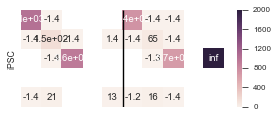

In [56]:
fig, ax = plt.subplots(figsize=(4, 1.75))
sns.heatmap(enrichment_2d, vmin=0, vmax=2000, annot=True)

ymin, ymax = ax.get_ylim()
ax.vlines(5, ymin, ymax)
ax.set(xticks=[], yticks=[], ylabel='iPSC', xlabel='')
fig.tight_layout()

## Barplot of changes to/from bimodal

In [57]:
modality_transitions.head()

,phenotype_x,event_id,modality_x,phenotype_y,modality_y,transition
0,MN,isoform1=junction:chr10:102114390-102120490:+|...,included,MN,included,MN-MN
1,MN,isoform1=junction:chr10:102114390-102120490:+|...,included,NPC,included,MN-NPC
2,MN,isoform1=junction:chr10:102114390-102120490:+|...,included,iPSC,included,MN-iPSC
3,NPC,isoform1=junction:chr10:102114390-102120490:+|...,included,MN,included,NPC-MN
4,NPC,isoform1=junction:chr10:102114390-102120490:+|...,included,NPC,included,NPC-NPC


In [58]:
modality_transitions['transition'] = modality_transitions['phenotype_x'] + '-' + modality_transitions['phenotype_y']
modality_transitions.head()

,phenotype_x,event_id,modality_x,phenotype_y,modality_y,transition
0,MN,isoform1=junction:chr10:102114390-102120490:+|...,included,MN,included,MN-MN
1,MN,isoform1=junction:chr10:102114390-102120490:+|...,included,NPC,included,MN-NPC
2,MN,isoform1=junction:chr10:102114390-102120490:+|...,included,iPSC,included,MN-iPSC
3,NPC,isoform1=junction:chr10:102114390-102120490:+|...,included,MN,included,NPC-MN
4,NPC,isoform1=junction:chr10:102114390-102120490:+|...,included,NPC,included,NPC-NPC


In [59]:
transitions_of_interest = ['iPSC-NPC', 'iPSC-MN']

In [60]:
transition_rows = modality_transitions.transition.isin(transitions_of_interest)
delta_modality_rows = modality_transitions['modality_x'] != modality_transitions['modality_y']
modality_transitions_different_modalities = modality_transitions.loc[transition_rows & delta_modality_rows]
modality_transitions_different_modalities['transition'] = pd.Categorical(modality_transitions_different_modalities['transition'], 
                                                           categories=transitions_of_interest, ordered=True)
modality_transitions_different_modalities.head()

/home/obotvinnik/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,phenotype_x,event_id,modality_x,phenotype_y,modality_y,transition
15,iPSC,isoform1=junction:chr10:102746733-102747069:-|...,included,MN,bimodal,iPSC-MN
16,iPSC,isoform1=junction:chr10:102746733-102747069:-|...,included,NPC,bimodal,iPSC-NPC
79,iPSC,isoform1=junction:chr10:104248896-104262356:-|...,bimodal,MN,included,iPSC-MN
80,iPSC,isoform1=junction:chr10:104248896-104262356:-|...,bimodal,NPC,included,iPSC-NPC
124,iPSC,isoform1=junction:chr10:1089334-1094803:-|isof...,uncategorized,MN,bimodal,iPSC-MN


In [61]:
delta_modalities = modality_transitions_different_modalities.groupby(['transition', 'modality_x', 'modality_y']).size()
delta_modalities = delta_modalities.reset_index()
delta_modalities = delta_modalities.rename(columns={0: '# AS Exons'})
delta_modalities

,transition,modality_x,modality_y,# AS Exons
0,iPSC-NPC,bimodal,excluded,105
1,iPSC-NPC,bimodal,included,80
2,iPSC-NPC,bimodal,uncategorized,1
3,iPSC-NPC,excluded,bimodal,151
4,iPSC-NPC,included,bimodal,195
5,iPSC-NPC,uncategorized,bimodal,21
6,iPSC-NPC,uncategorized,excluded,5
7,iPSC-MN,bimodal,excluded,54
8,iPSC-MN,bimodal,included,45
9,iPSC-MN,excluded,bimodal,97


In [62]:
delta_modalities.groupby('transition')['# AS Exons'].sum()

transition
iPSC-NPC    558
iPSC-MN     361
Name: # AS Exons, dtype: int64

In [63]:
col = '$\Delta$ Modality'

# Label everythign as "Other" first
delta_modalities[col] = 'Other'

modality1_bimodal = delta_modalities['modality_x'] == 'bimodal'
modality2_bimodal = delta_modalities['modality_y'] == 'bimodal'

# From bimodal
delta_modalities.loc[modality1_bimodal, col] = 'Bimodal --> X'

# To Bimodal
delta_modalities.loc[modality2_bimodal, col] = 'X --> Bimodal'
delta_modalities

,transition,modality_x,modality_y,# AS Exons,$\Delta$ Modality
0,iPSC-NPC,bimodal,excluded,105,Bimodal --> X
1,iPSC-NPC,bimodal,included,80,Bimodal --> X
2,iPSC-NPC,bimodal,uncategorized,1,Bimodal --> X
3,iPSC-NPC,excluded,bimodal,151,X --> Bimodal
4,iPSC-NPC,included,bimodal,195,X --> Bimodal
5,iPSC-NPC,uncategorized,bimodal,21,X --> Bimodal
6,iPSC-NPC,uncategorized,excluded,5,Other
7,iPSC-MN,bimodal,excluded,54,Bimodal --> X
8,iPSC-MN,bimodal,included,45,Bimodal --> X
9,iPSC-MN,excluded,bimodal,97,X --> Bimodal


In [64]:
delta_modalities['% Changing AS Exons'] = delta_modalities.groupby('transition')['# AS Exons'].apply(lambda x: 100*x/x.sum())
delta_modalities

,transition,modality_x,modality_y,# AS Exons,$\Delta$ Modality,% Changing AS Exons
0,iPSC-NPC,bimodal,excluded,105,Bimodal --> X,18.817204
1,iPSC-NPC,bimodal,included,80,Bimodal --> X,14.336918
2,iPSC-NPC,bimodal,uncategorized,1,Bimodal --> X,0.179211
3,iPSC-NPC,excluded,bimodal,151,X --> Bimodal,27.060932
4,iPSC-NPC,included,bimodal,195,X --> Bimodal,34.946237
5,iPSC-NPC,uncategorized,bimodal,21,X --> Bimodal,3.763441
6,iPSC-NPC,uncategorized,excluded,5,Other,0.896057
7,iPSC-MN,bimodal,excluded,54,Bimodal --> X,14.958449
8,iPSC-MN,bimodal,included,45,Bimodal --> X,12.465374
9,iPSC-MN,excluded,bimodal,97,X --> Bimodal,26.869806


In [65]:
delta_modalities.groupby(['transition', '$\Delta$ Modality'])['% Changing AS Exons'].sum()

transition  $\Delta$ Modality
iPSC-NPC    Bimodal --> X        33.333333
            Other                 0.896057
            X --> Bimodal        65.770609
iPSC-MN     Bimodal --> X        27.423823
            Other                 3.324100
            X --> Bimodal        69.252078
Name: % Changing AS Exons, dtype: float64

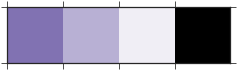

In [66]:
palette = sns.light_palette(MODALITY_TO_COLOR['bimodal'], n_colors=3, reverse=True) + ['k']
sns.palplot(palette)

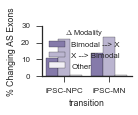

In [67]:
fig, ax = plt.subplots(figsize=(2, 1.5))

sns.barplot(x='transition', y='% Changing AS Exons', palette=palette,
            hue=col, data=delta_modalities, ci=None, order=transitions_of_interest)
ax.locator_params('y', nbins=4)
ax.set(ylabel='% Changing AS Exons')

sns.despine()
fig.tight_layout()
fig.savefig('{}/changing_modalities_barplot.pdf'.format(folder))

# ax.set(ylim=(0, 1))
# ax.legend_.set_visible(False)
# fig.savefig('{}/changing_modalities_barplot_zoom.pdf'.format(folder))

### Stacked bar plot

In [68]:
delta_modalities['$\Delta$ Modality'] = pd.Categorical(delta_modalities['$\Delta$ Modality'], 
                                                       categories=[ 'X --> Bimodal', 'Bimodal --> X', 'Other'], ordered=True)
# delta_modalities['transition'] = pd.Categorical(delta_modalities['transition'], 
#                                                        categories=transitions_of_interest, ordered=True)
delta_modalities

,transition,modality_x,modality_y,# AS Exons,$\Delta$ Modality,% Changing AS Exons
0,iPSC-NPC,bimodal,excluded,105,Bimodal --> X,18.817204
1,iPSC-NPC,bimodal,included,80,Bimodal --> X,14.336918
2,iPSC-NPC,bimodal,uncategorized,1,Bimodal --> X,0.179211
3,iPSC-NPC,excluded,bimodal,151,X --> Bimodal,27.060932
4,iPSC-NPC,included,bimodal,195,X --> Bimodal,34.946237
5,iPSC-NPC,uncategorized,bimodal,21,X --> Bimodal,3.763441
6,iPSC-NPC,uncategorized,excluded,5,Other,0.896057
7,iPSC-MN,bimodal,excluded,54,Bimodal --> X,14.958449
8,iPSC-MN,bimodal,included,45,Bimodal --> X,12.465374
9,iPSC-MN,excluded,bimodal,97,X --> Bimodal,26.869806


In [69]:
changing_as_exons = delta_modalities.groupby(['transition', col])['% Changing AS Exons'].sum()
changing_as_exons

transition  $\Delta$ Modality
iPSC-NPC    X --> Bimodal        65.770609
            Bimodal --> X        33.333333
            Other                 0.896057
iPSC-MN     X --> Bimodal        69.252078
            Bimodal --> X        27.423823
            Other                 3.324100
Name: % Changing AS Exons, dtype: float64

In [70]:
cumulative_sum = changing_as_exons.groupby(level=0).cumsum()
cumulative_sum

transition  $\Delta$ Modality
iPSC-NPC    X --> Bimodal         65.770609
            Bimodal --> X         99.103943
            Other                100.000000
iPSC-MN     X --> Bimodal         69.252078
            Bimodal --> X         96.675900
            Other                100.000000
Name: % Changing AS Exons, dtype: float64

In [71]:
bottoms = cumulative_sum - changing_as_exons
bottoms

transition  $\Delta$ Modality
iPSC-NPC    X --> Bimodal         0.000000
            Bimodal --> X        65.770609
            Other                99.103943
iPSC-MN     X --> Bimodal         0.000000
            Bimodal --> X        69.252078
            Other                96.675900
Name: % Changing AS Exons, dtype: float64

In [72]:
bottoms.index.levels[0]

CategoricalIndex([u'iPSC-NPC', u'iPSC-MN'], categories=[u'iPSC-NPC', u'iPSC-MN'], ordered=True, name=u'transition', dtype='category')

In [73]:
idx = pd.IndexSlice

X --> Bimodal
Bimodal --> X
Other


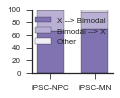

In [74]:
fig, ax = plt.subplots(figsize=(1.75, 1.5))
width = 0.6


for i, (delta_modality, s) in enumerate(changing_as_exons.groupby(level=1)):
    six.print_(delta_modality)
    color = palette[i]
    x = np.arange(s.shape[0]) + 0.1

    bottom = bottoms.loc[idx[:, delta_modality]]
    ax.bar(x, s, bottom=bottom, label=delta_modality, color=color, width=width)
ax.set(xticks=x + 0.3, xticklabels=bottoms.index.levels[0])
ax.legend()
sns.despine()
fig.tight_layout()
fig.savefig('{}/changing_modalities_bimodal_barplot_stacked.pdf'.format(folder))


### Pie chart for graphic summary

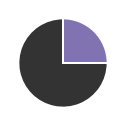

In [75]:
fig, ax = plt.subplots(figsize=(2, 2))

ax.pie([.75, .25], startangle=90, colors=['.20', MODALITY_TO_COLOR['bimodal']], 
       wedgeprops = { 'linewidth' : 2, 'edgecolor':'white' })
fig.savefig('{}/bimodal_unimodal_pie_chart.pdf'.format(folder))

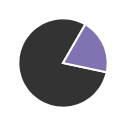

In [76]:
fig, ax = plt.subplots(figsize=(2, 2))

ax.pie([.8, .20], startangle=60, colors=['.20', MODALITY_TO_COLOR['bimodal']],
       wedgeprops = { 'linewidth' : 2, 'edgecolor':'white' })
fig.savefig('{}/changing_events_pie_chart.pdf'.format(folder))

In [77]:
study.supplemental.modalities_tidy.groupby('phenotype').size()

phenotype
MN      2076
NPC     3036
iPSC    4434
dtype: int64